In [1]:
# If we're running on Colab, install libraries

import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    !pip install astroquery astro-gala pyia
    !mkdir data

## Using ADQL to download Gaia data

Gaia TAP+ (Table Access Protocol) 
https://astroquery.readthedocs.io/en/latest/gaia/gaia.html
    
"The TAP query language is Astronomical Data Query Language (ADQL: http://www.ivoa.net/documents/ADQL/2.0), which is similar to Structured Query Language (SQL), widely used to query databases."

"An Astronomy Data Query Language cookbook to accompany Gaia Data Release 1"
https://www.gaia.ac.uk/data/gaia-data-release-1/adql-cookbook

In [2]:
from astroquery.gaia import Gaia

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


A database contains tables.

Get the names of the tables.


In [3]:
tables = Gaia.load_tables(only_names=True)
for table in (tables):
    print(table.get_qualified_name())

INFO: Retrieving tables... [astroquery.utils.tap.core]
INFO: Parsing tables... [astroquery.utils.tap.core]
INFO: Done. [astroquery.utils.tap.core]
external.external.apassdr9
external.external.gaiadr2_geometric_distance
external.external.galex_ais
external.external.ravedr5_com
external.external.ravedr5_dr5
external.external.ravedr5_gra
external.external.ravedr5_on
external.external.sdssdr13_photoprimary
external.external.skymapperdr1_master
external.external.tmass_xsc
public.public.hipparcos
public.public.hipparcos_newreduction
public.public.hubble_sc
public.public.igsl_source
public.public.igsl_source_catalog_ids
public.public.tycho2
public.public.dual
tap_config.tap_config.coord_sys
tap_config.tap_config.properties
tap_schema.tap_schema.columns
tap_schema.tap_schema.key_columns
tap_schema.tap_schema.keys
tap_schema.tap_schema.schemas
tap_schema.tap_schema.tables
gaiadr1.gaiadr1.aux_qso_icrf2_match
gaiadr1.gaiadr1.ext_phot_zero_point
gaiadr1.gaiadr1.allwise_best_neighbour
gaiadr1.gaiad

Get information about the table

`load_table` is a misleading name: loads metadata, not data.

Jupyter note: some object look different if you display them or print them.

In [4]:
table = Gaia.load_table('gaiadr2.gaia_source')
table

Retrieving table 'gaiadr2.gaia_source'
Parsing table 'gaiadr2.gaia_source'...
Done.


In [5]:
print(table)

TAP Table name: gaiadr2.gaiadr2.gaia_source
Description: This table has an entry for every Gaia observed source as listed in the
Main Database accumulating catalogue version from which the catalogue
release has been generated. It contains the basic source parameters,
that is only final data (no epoch data) and no spectra (neither final
nor epoch).
Num. columns: 96


ADQL is a dialect of SQL; the structure of the queries is the same.

SELECT
FROM
ORDER

TOP is the ADQL version of LIMIT.

In [6]:
query1 = """SELECT TOP 10
solution_id, ref_epoch, ra_dec_corr, 
astrometric_n_obs_al, matched_observations
FROM gaiadr2.gaia_source 
ORDER by source_id"""

Submit a synchronous query; launches immediately, limit of 2000 rows.

In [7]:
job1 = Gaia.launch_job(query1)
job1

Job object contains metadata

In [8]:
print(job1)

<Table length=10>
        name          dtype  unit                     description                    
-------------------- ------- ---- ---------------------------------------------------
         solution_id   int64                                      Solution Identifier
           ref_epoch float64   yr                                     Reference epoch
         ra_dec_corr float32      Correlation between right ascension and declination
astrometric_n_obs_al   int32                          Total number of observations AL
matched_observations   int16            Amount of observations matched to this source
Jobid: None
Phase: COMPLETED
Owner: None
Output file: sync_20200713142602.xml.gz
Results: None


Get results.  The results is an Astropy Table

https://docs.astropy.org/en/stable/table/

In [9]:
results1 = job1.get_results()
type(results1)

astropy.table.table.Table

Tables know how to display themselves: each column has units and a data type.

In [10]:
results1

solution_id,ref_epoch,ra_dec_corr,astrometric_n_obs_al,matched_observations
,yr,,,
int64,float64,float32,int32,int16
1635721458409799680,2015.5,0.022670548,107,13
1635721458409799680,2015.5,0.06490505,97,11
1635721458409799680,2015.5,0.11690165,104,12
1635721458409799680,2015.5,0.042778816,114,13
1635721458409799680,2015.5,0.095711425,114,13
1635721458409799680,2015.5,0.56088775,105,12
1635721458409799680,2015.5,-0.0028029205,114,13
1635721458409799680,2015.5,0.11152559,104,12


We can submit the same query asynchronously; might not run immediately.  Results are stored in a file on the server, so you can read them later.

For anonymous users, files are kept for three days.

In [11]:
query2 = query1

In [12]:
job2 = Gaia.launch_job_async(query2)
print(job2)

INFO: Query finished. [astroquery.utils.tap.core]
<Table length=10>
        name          dtype  unit                     description                    
-------------------- ------- ---- ---------------------------------------------------
         solution_id   int64                                      Solution Identifier
           ref_epoch float64   yr                                     Reference epoch
         ra_dec_corr float32      Correlation between right ascension and declination
astrometric_n_obs_al   int32                          Total number of observations AL
matched_observations   int16            Amount of observations matched to this source
Jobid: 1594664768591O
Phase: COMPLETED
Owner: None
Output file: async_20200713142608.vot
Results: None


In [13]:
results2 = job2.get_results()
results2

solution_id,ref_epoch,ra_dec_corr,astrometric_n_obs_al,matched_observations
,yr,,,
int64,float64,float32,int32,int16
1635721458409799680,2015.5,0.022670548,107,13
1635721458409799680,2015.5,0.06490505,97,11
1635721458409799680,2015.5,0.11690165,104,12
1635721458409799680,2015.5,0.042778816,114,13
1635721458409799680,2015.5,0.095711425,114,13
1635721458409799680,2015.5,0.56088775,105,12
1635721458409799680,2015.5,-0.0028029205,114,13
1635721458409799680,2015.5,0.11152559,104,12


Asynchronous jobs have a `jobid`.

In [14]:
job1.jobid, job2.jobid

(None, '1594664768591O')

Which you can use to remove the job from the server.

TODO: Confirm that this means the data file gets deleted.

In [15]:
Gaia.remove_jobs([job2.jobid])

Removed jobs: '['1594664768591O']'.


## Formatting queries

So far the queries have been string "literals", meaning that the entire string is part of the program.

It is more common to assemble a string programmatically using the string `format` method.

As an example, here's a list of columns we might want to select.

In [168]:
gaia_cols = ['source_id', 
             'ra', 'ra_error',
             'dec', 'dec_error',
             'pmra', 'pmra_error',
             'pmdec', 'pmdec_error',
             'parallax', 'parallax_error', 
             ]

Before we assemble the string, we'll join the column names into a single string with commas and spaces.

In [169]:
columns = ', '.join(gaia_cols)
columns

'source_id, ra, ra_error, dec, dec_error, pmra, pmra_error, pmdec, pmdec_error, parallax, parallax_error'

The following is a "base" for a query; it's a string that contains at least one format specification in curly brackets (braces).

In [170]:
query_base = """SELECT TOP 10
{columns}
FROM gaiadr2.gaia_source
WHERE parallax < 1 AND bp_rp > -0.75 AND bp_rp < 2
"""

To assemble the query, we invoke `format` on the base string and provide keyword arguments.

https://www.w3schools.com/python/ref_string_format.asp

Each keyword argument assigns a value to a variable.  Then we can access the variables in the format specification.

In [171]:
query3 = query_base.format(columns=columns)

We'll use the following function to print multi-line queries readably.

In [172]:
def print_query(query):
    for line in query.split('\n'):
        print(line)

Here's the query we just assembled.

In [173]:
print_query(query3)

SELECT TOP 10
source_id, ra, ra_error, dec, dec_error, pmra, pmra_error, pmdec, pmdec_error, parallax, parallax_error
FROM gaiadr2.gaia_source
WHERE parallax < 1 AND bp_rp > -0.75 AND bp_rp < 2



The format specifier has been replaced with the value of `columns`.

We've already run this query, but we can run it again to confirm that our assembled query works.

In [174]:
job3 = Gaia.launch_job(query3)
print(job3)

<Table length=10>
     name       dtype    unit                              description                            
-------------- ------- -------- ------------------------------------------------------------------
     source_id   int64          Unique source identifier (unique within a particular Data Release)
            ra float64      deg                                                    Right ascension
      ra_error float64      mas                                  Standard error of right ascension
           dec float64      deg                                                        Declination
     dec_error float64      mas                                      Standard error of declination
          pmra float64 mas / yr                         Proper motion in right ascension direction
    pmra_error float64 mas / yr       Standard error of proper motion in right ascension direction
         pmdec float64 mas / yr                             Proper motion in declination di

In [175]:
results3 = job3.get_results()
results3

source_id,ra,ra_error,dec,dec_error,pmra,pmra_error,pmdec,pmdec_error,parallax,parallax_error
,deg,mas,deg,mas,mas / yr,mas / yr,mas / yr,mas / yr,mas,mas
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
6217670360232218624,222.24868936409703,0.2969833440612967,-30.923144891399538,0.23043925775127005,-7.2258253648604835,0.6295241766036433,-4.348014493222783,0.5794282856690133,0.3239603117970101,0.31640487112620036
6217561375447431680,221.63339116591166,0.08528649363459119,-31.31352992035746,0.07188059245653752,-2.6413717900105693,0.2150119210725904,-2.7697823167789974,0.164780026054111,0.39215447843481416,0.11343848483202414
6217600614268376192,221.2386583667728,0.17508371388253097,-31.211564507681278,0.18882203426011224,-4.271669007440731,0.3773537094007447,-6.111285008804571,0.44715963234492623,0.28118952749455206,0.2257544338328574
6217566735566614784,221.74830459963118,0.5834664415227904,-31.28621465882243,0.412795560178545,-12.183493967373952,1.3629325069114273,-5.911373784652174,0.8097401327491069,-0.9509408261688624,0.6767783886288803
6217634527330581504,221.51296320840322,0.11121729011720687,-30.91280619231086,0.08906536597208431,-5.2317603864912,0.27120662294028375,-7.187722071324453,0.17940126967039058,0.15155544716600186,0.1307579579970016
6217601026585237120,221.18628001895505,0.12985885077254897,-31.221788391993588,0.1417803493473326,-6.238593889653304,0.2853393821854402,-3.3940381604392225,0.34502782959733125,0.6414271681470406,0.1731606355634132
6217696271780669184,222.33071980998469,0.07347615472195018,-30.742558393620598,0.07852682523741626,-3.913692054502671,0.21708425465207162,-1.7432173724805493,0.2916751052991129,0.3515449242820345,0.09891567533516914
6217667645812923008,221.9954681521195,0.7324877880853415,-30.910433688365302,0.4566156667149686,-3.569392200204537,1.191662605858119,-1.7227387464168369,0.9392696611128576,-0.16669732534695056,0.7528393694754654


## Working with coordinates

The next step is to select a viewing rectangle, but before we do that, we have to deal with coordinates.

In [24]:
import astropy.units as u

low1, high1 = -55, -45
phi1 = [low1, low1, high1, high1] * u.deg

low2, high2 = -4, 6
phi2 = [low2, high2, high2, low2] * u.deg

`gc.GD1Koposov10` is the [Astropy coordinate class for the Sagittarius coordinate system](https://gala-astro.readthedocs.io/en/latest/_modules/gala/coordinates/gd1.html)

In [596]:
import gala.coordinates as gc

corners = gc.GD1Koposov10(phi1=phi1, phi2=phi2)
corners

<GD1Koposov10 Coordinate: (phi1, phi2) in deg
    [(-54.97562251, -3.65934904), (-54.49824711, -3.08152389),
     (-54.55163387, -3.55422922), ..., (-46.10132112, -1.85927928),
     (-46.22166609, -2.07777598), (-45.90534196, -2.17949995)]>

Convert to [International Celestial Reference System](https://en.wikipedia.org/wiki/International_Celestial_Reference_System)

In [26]:
import astropy.coordinates as coord

corners_icrs = corners.transform_to(coord.ICRS)
corners_icrs

<ICRS Coordinate: (ra, dec) in deg
    [(142.7716385 , 21.54635332), (133.50420107, 26.90206061),
     (139.56031463, 35.39626209), (149.26169475, 29.6303776 )]>

In [27]:
corners_icrs[0]

<ICRS Coordinate: (ra, dec) in deg
    (142.7716385, 21.54635332)>

In [28]:
corners_icrs[0].ra

<Longitude 142.7716385 deg>

In [29]:
corners_icrs[0].ra.degree

142.7716385024318

We can use `corners_icrs` to specify a polygon and construct a more complex query.

In [30]:
query4_base = """SELECT {columns}
FROM gaiadr2.gaia_source
WHERE parallax < 1 AND bp_rp > -0.75 AND bp_rp < 2 AND
      CONTAINS(POINT('ICRS', ra, dec), 
               POLYGON('ICRS', 
                       {c[0].ra.degree}, {c[0].dec.degree}, 
                       {c[1].ra.degree}, {c[1].dec.degree}, 
                       {c[2].ra.degree}, {c[2].dec.degree}, 
                       {c[3].ra.degree}, {c[3].dec.degree})) = 1
"""

Here's what it looks like.

In [31]:
query4 = query4_base.format(columns=columns, c=corners_icrs)
print_query(query4)

SELECT source_id, ra, dec, pmra, pmdec, parallax, parallax_error
FROM gaiadr2.gaia_source
WHERE parallax < 1 AND bp_rp > -0.75 AND bp_rp < 2 AND
      CONTAINS(POINT('ICRS', ra, dec), 
               POLYGON('ICRS', 
                       142.7716385024318, 21.546353324354072, 
                       133.5042010718342, 26.902060612630827, 
                       139.5603146332043, 35.39626209390598, 
                       149.26169474640096, 29.63037759884082)) = 1



And here's how we run it.

In [32]:
job4 = Gaia.launch_job_async(query4)
print(job4)

INFO: Query finished. [astroquery.utils.tap.core]
<Table length=123365>
     name       dtype    unit                              description                            
-------------- ------- -------- ------------------------------------------------------------------
     source_id   int64          Unique source identifier (unique within a particular Data Release)
            ra float64      deg                                                    Right ascension
           dec float64      deg                                                        Declination
          pmra float64 mas / yr                         Proper motion in right ascension direction
         pmdec float64 mas / yr                             Proper motion in declination direction
      parallax float64      mas                                                           Parallax
parallax_error float64      mas                                         Standard error of parallax
Jobid: 1594664790814O
Phase: COMPLETE

In [33]:
results4 = job4.get_results()
len(results4)

123365

## Saving results

In [34]:
!mkdir data

mkdir: cannot create directory ‘data’: File exists


In [35]:
filename = 'data/gd1_results4.fits'
results4.write(filename, overwrite=True)

In [36]:
import os

def filesize(filename):
    size = os.path.getsize(filename)
    print(size / 1024 / 1024, 'MB')

In [37]:
filesize(filename)

6.60003662109375 MB


In [182]:
from astropy.table import Table

filename = 'data/gd1_results4.fits'
results4 = Table.read(filename)

In [183]:
results4.info

<Table length=123365>
     name       dtype    unit                              description                            
-------------- ------- -------- ------------------------------------------------------------------
     source_id   int64          Unique source identifier (unique within a particular Data Release)
            ra float64      deg                                                    Right ascension
           dec float64      deg                                                        Declination
          pmra float64 mas / yr                         Proper motion in right ascension direction
         pmdec float64 mas / yr                             Proper motion in declination direction
      parallax float64      mas                                                           Parallax
parallax_error float64      mas                                         Standard error of parallax

## Making a function

In [569]:
def transform_rectangle(low1, high1, low2, high2):
    phi1 = [low1, low1, high1, high1] * u.deg
    phi2 = [low2, high2, high2, low2] * u.deg
    corners = gc.GD1(phi1=phi1, phi2=phi2)
    corners_icrs = corners.transform_to(coord.ICRS)
    return corners_icrs

In [588]:
corners_icrs = transform_rectangle(-55, -45, -4, 6)

In [589]:
assert(corners_icrs[0].ra.degree == 142.7716385024318)

In [590]:
point_base = "{point.ra.degree}, {point.dec.degree}"

t = [point_base.format(point=point)
     for point in corners_icrs]
print(t)

['142.7716385024318, 21.546353324354072', '133.5042010718342, 26.902060612630827', '139.5603146332043, 35.39626209390598', '149.26169474640096, 29.63037759884082']


In [591]:
poly_base = "POLYGON('ICRS', {point_list})"

point_list = ', '.join(t)
poly_base.format(point_list=point_list)

"POLYGON('ICRS', 142.7716385024318, 21.546353324354072, 133.5042010718342, 26.902060612630827, 139.5603146332043, 35.39626209390598, 149.26169474640096, 29.63037759884082)"

In [595]:
def make_adql_polygon(coords):
    """
    """
    point_base = "{point.ra.degree}, {point.dec.degree}"

    t = [point_base.format(point=point)
         for point in coords]

    poly_base = "POLYGON('ICRS', {point_list})"
    point_list = ', '.join(t)
    return poly_base.format(point_list=point_list)

In [661]:
polygon1 = make_adql_polygon(corners_icrs)

In [661]:
corners_icrs = transform_rectangle(-55, -45, -4, 6)
polygon2 = make_adql_polygon(corners_icrs)

## Selecting rows and columns

In [572]:
results4.colnames

['source_id', 'ra', 'dec', 'pmra', 'pmdec', 'parallax', 'parallax_error']

In [44]:
results4.info

<Table length=123365>
     name       dtype    unit                              description                            
-------------- ------- -------- ------------------------------------------------------------------
     source_id   int64          Unique source identifier (unique within a particular Data Release)
            ra float64      deg                                                    Right ascension
           dec float64      deg                                                        Declination
          pmra float64 mas / yr                         Proper motion in right ascension direction
         pmdec float64 mas / yr                             Proper motion in declination direction
      parallax float64      mas                                                           Parallax
parallax_error float64      mas                                         Standard error of parallax

In [45]:
results4['ra']

142.48301935991023
142.25452941346344
142.64528557468074
142.57739430926034
142.58913564478618
141.81762228999614
143.18339801317677
142.9347319464589
142.26769745823267
142.2780935768316
142.06138786534987


In [46]:
results4[0]

source_id,ra,dec,pmra,pmdec,parallax,parallax_error
,deg,deg,mas / yr,mas / yr,mas,mas
int64,float64,float64,float64,float64,float64,float64
637987125186749568,142.48301935991023,21.75771616932985,-2.5168384683875766,2.941813096629439,-0.2573448962333354,0.823720794509811


In [47]:
results4['ra'][0]

142.48301935991023

In [48]:
results4[0]['ra']

142.48301935991023

https://docs.astropy.org/en/stable/table/

## Transform back

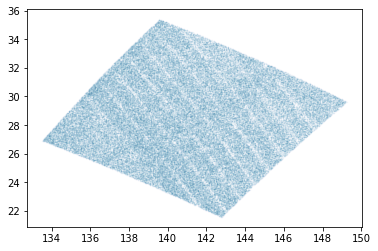

In [50]:
import matplotlib.pyplot as plt

x = results4['ra']
y = results4['dec']
plt.plot(x, y, 'o', markersize=0.5, alpha=0.05)

In [51]:
from pyia import GaiaData

filename = 'data/gd1_results4.fits'
g = GaiaData(filename)
type(g)

pyia.data.GaiaData

In [52]:
for name in dir(g):
    print(name)

__class__
__delattr__
__dict__
__dir__
__doc__
__eq__
__format__
__ge__
__getattr__
__getattribute__
__getitem__
__gt__
__hash__
__init__
__init_subclass__
__le__
__len__
__lt__
__module__
__ne__
__new__
__reduce__
__reduce_ex__
__repr__
__setattr__
__sizeof__
__str__
__subclasshook__
__weakref__
_cache
_has_rv
_invalid_units
data
dec
distance
distmod
from_query
get_BP0
get_G0
get_RP0
get_cov
get_distance
get_ebv
get_error_samples
get_ext
get_radial_velocity
get_skycoord
parallax
parallax_error
pm
pmdec
pmra
ra
skycoord
source_id
units
vtan


https://pyia.readthedocs.io/en/latest/api/pyia.GaiaData.html

In [53]:
c_sky = g.get_skycoord(distance=8*u.kpc, 
                       radial_velocity=0*u.km/u.s)
type(c_sky)

astropy.coordinates.sky_coordinate.SkyCoord

In [55]:
c_gd1 = gc.reflex_correct(c_sky.transform_to(gc.GD1))

type(c_gd1)

astropy.coordinates.sky_coordinate.SkyCoord

In [57]:
for name in dir(c_gd1):
    print(name)

T
__abstractmethods__
__bool__
__class__
__delattr__
__dict__
__dir__
__doc__
__eq__
__format__
__ge__
__getattr__
__getattribute__
__getitem__
__gt__
__hash__
__init__
__init_subclass__
__iter__
__le__
__len__
__lt__
__module__
__ne__
__new__
__reduce__
__reduce_ex__
__repr__
__setattr__
__sizeof__
__str__
__subclasshook__
__weakref__
_abc_impl
_apply
_extra_frameattr_names
_is_name
_sky_coord_frame
altaz
apply_space_motion
barycentricmeanecliptic
barycentrictrueecliptic
cache
cartesian
center
cirs
contained_by
copy
custombarycentricecliptic
cylindrical
data
default_differential
default_representation
diagonal
differential_type
directional_offset_by
distance
equinox
fk4
fk4noeterms
fk5
flatten
frame
frame_attributes
frame_specific_representation_info
from_name
from_pixel
galactic
galacticlsr
galactocentric
galcen_coord
galcen_distance
galcen_v_sun
gcrs
gd1
gd1koposov10
geocentricmeanecliptic
geocentrictrueecliptic
get_constellation
get_frame_attr_names
get_representation_cls
get_repre

In [59]:
# TODO: should we be using proper_motion rather than 
# pm_phi1_cosphi2 and pm_phi2

c_gd1.proper_motion

<Quantity [[  6.42994451,  -3.16863659,   9.1294466 , ...,   3.81447019,
             -3.79316163,  -0.91899483],
           [  6.51815743,  -6.20679458, -16.81956952, ...,   3.8857666 ,
              7.4531807 ,  -3.47057032]] mas / yr>

https://docs.astropy.org/en/stable/api/astropy.coordinates.SkyCoord.html#astropy.coordinates.SkyCoord

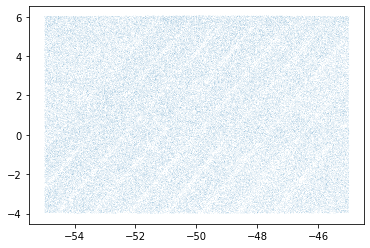

In [60]:
import matplotlib.pyplot as plt

plt.plot(c_gd1.phi1,
         c_gd1.phi2,
         marker=',', linestyle='none', alpha=0.05)

Extract coordinates and proper motion.

In [61]:
phi1 = c_gd1.phi1.wrap_at(180*u.deg)
phi2 = c_gd1.phi2
pm1 = c_gd1.pm_phi1_cosphi2
pm2 = c_gd1.pm_phi2

Boolean Series to select stars near the centerline of GD-1

In [62]:
import numpy as np

phi_mask = (np.abs(phi2) < 1*u.deg)
phi_mask.sum()

25084

In [63]:
centerline = c_gd1[phi_mask]
len(centerline)

25084

In [64]:
def plot_proper_motion(coords):
    pm1 = coords.pm_phi1_cosphi2
    pm2 = coords.pm_phi2
    plt.plot(pm1, pm2, '.',
             markersize=1, alpha=0.1)
    
    plt.xlabel('Proper motion phi1')
    plt.ylabel('Proper motion phi2')

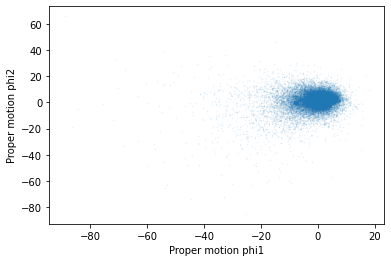

In [65]:
plot_proper_motion(centerline)

(-10.0, 10.0)

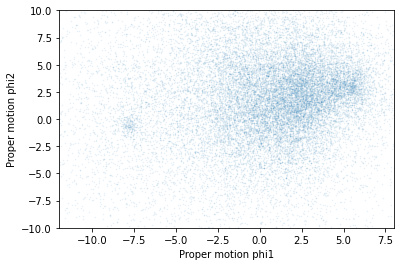

In [66]:
plot_proper_motion(centerline)

plt.xlim(-12, 8)
plt.ylim(-10, 10)

Boolean Series to select stars in the "overdense" region of proper motion.

In [67]:
pm1_min = -8.7*u.mas/u.yr
pm1_max = -7.*u.mas/u.yr
pm2_min = -1.7*u.mas/u.yr
pm2_max = 1.*u.mas/u.yr

pm_mask = ((pm1 < pm1_max) & (pm1 > pm1_min) & 
           (pm2 < pm2_max) & (pm2 > pm2_min))

pm_mask.sum()

722

The bounds on proper motion are quantities with units.

In [68]:
pm1_min

<Quantity -8.7 mas / yr>

To use them with Matplotlib, we have to select the value and drop the units.

In [69]:
pm1_min.value

-8.7

Now we can make a Rectangle to show the selected values of proper motion.

(-10.0, 10.0)

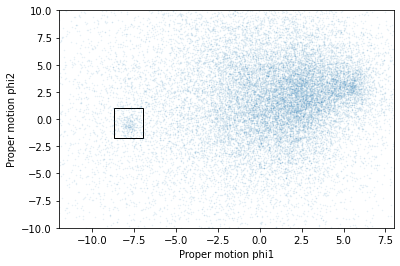

In [70]:
from matplotlib.patches import Rectangle

width = pm1_max - pm1_min
height = pm2_max - pm2_min
corner = (pm1_min.value, pm2_min.value)

rect = Rectangle(corner, width.value, height.value,
                     fill=False)


plot_proper_motion(centerline)

plt.gca().add_patch(rect)

plt.xlim(-12, 8)
plt.ylim(-10, 10)

In [152]:
def plot_coords(coords):
    plt.plot(coords.phi1, coords.phi2,
             marker='.', linestyle='none', alpha=0.2)
    
    plt.xlabel('Right ascension phi1')
    plt.ylabel('Declination phi2')

In [242]:
candidates = c_gd1[pm_mask]
len(candidates)

722

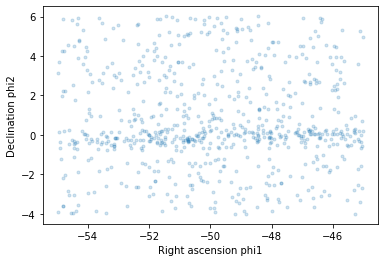

In [243]:
plot_coords(candidates)

## Add WHERE clause for proper motion

In [602]:
results4.colnames

['source_id', 'ra', 'dec', 'pmra', 'pmdec', 'parallax', 'parallax_error']

In [ ]:
pmra = results4['pmra']
pmdec = results4['pmdec']

(-20.0, 10.0)

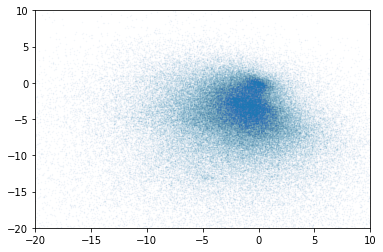

In [603]:
plt.plot(pmra, pmdec, 'o', markersize=0.5, alpha=0.05)
plt.xlim([-20, 10])
plt.ylim([-20, 10])

In [641]:
pmra_min = -7 * u.mas/u.yr
pmra_max = -2 * u.mas/u.yr
pmdec_min = -15 * u.mas/u.yr
pmdec_max = -11 * u.mas/u.yr

pm_mask2 = ((pmra < pmra_max) & (pmra > pmra_min) & 
            (pmdec < pmdec_max) & (pmdec > pmdec_min))

pm_mask2.sum()

2601

In [643]:
(pm_mask & pm_mask2).sum(), pm_mask.sum()

(722, 722)

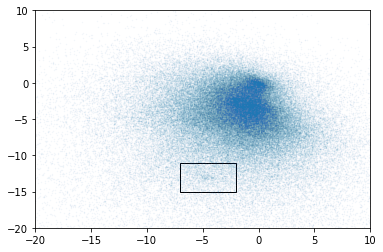

In [644]:
width = pmra_max - pmra_min
height = pmdec_max - pmdec_min
corner = (pmra_min.value, pmdec_min.value)

rect2 = Rectangle(corner, width.value, height.value,
                  fill=False)

plt.gca().add_patch(rect2)

plt.plot(pmra, pmdec, 'o', markersize=0.5, alpha=0.05)
plt.xlim([-20, 10])
plt.ylim([-20, 10]);

In [677]:
query5_base = """SELECT {columns}
FROM gaiadr2.gaia_source
WHERE parallax < 1 AND bp_rp > -0.75 AND bp_rp < 2 AND
      CONTAINS(POINT('ICRS', ra, dec), 
               {polygon}) = 1 AND
      pmra > {pmra_min} AND
      pmra < {pmra_max} AND
      pmdec > {pmdec_min} AND
      pmdec < {pmdec_max}
"""

In [680]:
corners_icrs = transform_rectangle(-100, -20, -5, 5)
polygon = make_adql_polygon(corners_icrs)

In [709]:
corners_icrs = transform_rectangle(-70, -20, -5, 5)
polygon = make_adql_polygon(corners_icrs)

In [710]:
query5 = query5_base.format(columns=columns, 
                            polygon=polygon,
                            pmra_min=pmra_min.value,
                            pmra_max=pmra_max.value,
                            pmdec_min=pmdec_min.value,
                            pmdec_max=pmdec_max.value)
print_query(query5)

SELECT source_id, ra, ra_error, dec, dec_error, pmra, pmra_error, pmdec, pmdec_error, parallax, parallax_error
FROM gaiadr2.gaia_source
WHERE parallax < 1 AND bp_rp > -0.75 AND bp_rp < 2 AND
      CONTAINS(POINT('ICRS', ra, dec), 
               POLYGON('ICRS', 135.30559858565638, 8.398623940157561, 126.50951508623503, 13.44494195652069, 163.0173655836748, 54.24242734020255, 172.9328536286811, 46.47260492416258)) = 1 AND
      pmra > -7.0 AND
      pmra < -2.0 AND
      pmdec > -15.0 AND
      pmdec < -11.0



And here's how we run it.

In [711]:
job5 = Gaia.launch_job_async(query5)
print(job5)

INFO: Query finished. [astroquery.utils.tap.core]
<Table length=13976>
     name       dtype    unit                              description                            
-------------- ------- -------- ------------------------------------------------------------------
     source_id   int64          Unique source identifier (unique within a particular Data Release)
            ra float64      deg                                                    Right ascension
      ra_error float64      mas                                  Standard error of right ascension
           dec float64      deg                                                        Declination
     dec_error float64      mas                                      Standard error of declination
          pmra float64 mas / yr                         Proper motion in right ascension direction
    pmra_error float64 mas / yr       Standard error of proper motion in right ascension direction
         pmdec float64 mas / yr       

In [712]:
results5 = job5.get_results()
len(results5)

13976

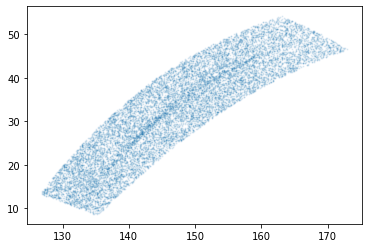

In [713]:
x5 = results5['ra']
y5 = results5['dec']
plt.plot(x5, y5, 'o', markersize=1, alpha=0.1)

## Distance

At this point we have three representations of the data with three different objects.

In [244]:
from astropy.table import Table

gaia_filename = 'data/gd1_results4.fits'
table = Table.read(gaia_filename)
type(table)

astropy.table.table.Table

In [136]:
type(g)

pyia.data.GaiaData

In [137]:
type(c_gd1)

astropy.coordinates.sky_coordinate.SkyCoord

On one hand, this makes sense, since each object provides different capabilities.  However, it gets to be difficult to work with.

We should choose one object and get all of the data into it.  I choose a Pandas DataFrame.  Two reasons:

1) It provides capabilities that are pretty much a superset of the other data structures, so it's the all-in-one solution.

2) Pandas is a general-purpose tool that is useful in many domains.  If you are going to develop expertise in one tool, Pandas is a good one to choose.

It's easy to convert the Table to a DataFrame.

In [116]:
import pandas as pd

df = table.to_pandas()
df.head()

,source_id,ra,dec,pmra,pmdec,parallax,parallax_error
0,637987125186749568,142.483019,21.757716,-2.516838,2.941813,-0.257345,0.823721
1,638285195917112960,142.254529,22.476168,2.662702,-12.165984,0.422728,0.297472
2,638073505568978688,142.645286,22.166932,18.306747,-7.950660,0.103640,0.544584
3,638086386175786752,142.577394,22.227920,0.987786,-2.584105,-0.857327,1.059607
4,638049655615392384,142.589136,22.110783,0.244439,-4.941079,0.099625,0.486224


Now we can extract the columns we want from `c_gd1`.

In [118]:
df['phi1'] = c_gd1.phi1
df['phi2'] = c_gd1.phi2
df['pm_phi1'] = c_gd1.pm_phi1_cosphi2
df['pm_phi2'] = c_gd1.pm_phi2

We can use the mask we computed earlier to select the GD-1 candidate stars.

In [237]:
candidate_df = df.loc[pm_mask].copy()
len(candidate_df)

722

In [379]:
candidate_table = results4[pm_mask][['source_id']]
type(candidate_table)

astropy.table.table.Table

## Join with best neighbor

In [328]:
match_columns = ['gaia.source_id', 
                 'best.source_id',
 'best.original_ext_source_id',
 'best.angular_distance',
 'best.number_of_neighbours',
 'best.number_of_mates',
 'best.best_neighbour_multiplicity',
 'best.gaia_astrometric_params']

col_string = ', '.join(match_columns)

In [331]:
query6_base = """SELECT {columns} 
FROM gaiadr2.gaia_source AS gaia
LEFT JOIN gaiadr2.panstarrs1_best_neighbour AS best 
ON gaia.source_id = best.source_id
WHERE parallax < 1 AND bp_rp > -0.75 AND bp_rp < 2 
AND CONTAINS(POINT('ICRS', ra, dec), 
               POLYGON('ICRS', 
                       {c[0].ra.degree}, {c[0].dec.degree}, 
                       {c[1].ra.degree}, {c[1].dec.degree}, 
                       {c[2].ra.degree}, {c[2].dec.degree}, 
                       {c[3].ra.degree}, {c[3].dec.degree})) = 1
"""

In [332]:
query6 = query6_base.format(columns=col_string, c=corners_icrs)
print_query(query6)

SELECT gaia.source_id, best.source_id, best.original_ext_source_id, best.angular_distance, best.number_of_neighbours, best.number_of_mates, best.best_neighbour_multiplicity, best.gaia_astrometric_params 
FROM gaiadr2.gaia_source AS gaia
LEFT JOIN gaiadr2.panstarrs1_best_neighbour AS best 
ON gaia.source_id = best.source_id
WHERE parallax < 1 AND bp_rp > -0.75 AND bp_rp < 2 
AND CONTAINS(POINT('ICRS', ra, dec), 
               POLYGON('ICRS', 
                       142.7716385024318, 21.546353324354072, 
                       133.5042010718342, 26.902060612630827, 
                       139.5603146332043, 35.39626209390598, 
                       149.26169474640096, 29.63037759884082)) = 1



In [333]:
job5 = Gaia.launch_job_async(query6)
job5

INFO: Query finished. [astroquery.utils.tap.core]


In [334]:
results5 = job5.get_results()
results5

source_id,source_id_2,original_ext_source_id,angular_distance,number_of_neighbours,number_of_mates,best_neighbour_multiplicity,gaia_astrometric_params
,,,arcsec,,,,
int64,int64,int64,float64,int32,int16,int16,int16
637987125186749568,637987125186749568,134101424830549807,0.004257977141544992,1,0,1,5
638285195917112960,--,--,--,--,--,--,--
638073505568978688,638073505568978688,134601426452320856,0.01514828986898979,1,0,1,5
638086386175786752,638086386175786752,134671425773534040,0.019865235407639858,1,0,1,5
638049655615392384,638049655615392384,134531425891863459,0.016206931792406468,1,0,1,5
638267565075964032,638267565075964032,134851418175601407,0.010868017346570806,1,0,1,5
638028902333511168,638028902333511168,134701431833742076,0.020054851139044802,1,0,1,5
638085767700610432,638085767700610432,134951429347745644,0.03165202719132081,1,0,1,5


## Join the results

In [335]:
from astropy.table import join

In [336]:
joined = join(results4, results5, keys='source_id')

In [337]:
joined.colnames

['source_id',
 'ra',
 'dec',
 'pmra',
 'pmdec',
 'parallax',
 'parallax_error',
 'source_id_2',
 'original_ext_source_id',
 'angular_distance',
 'number_of_neighbours',
 'number_of_mates',
 'best_neighbour_multiplicity',
 'gaia_astrometric_params']

In [339]:
joined['original_ext_source_id']

133881427658932172
133891427810196523
133891427853779996
133891427332324455
--
133911427237396099
--
133931427591650562
133961427536324507
133961427894135074
133921426834925338


## Select using WHERE ... IN

https://www.dofactory.com/sql/where-in

In [224]:
query_in_base = """SELECT *
FROM gaiadr2.panstarrs1_best_neighbour 
WHERE source_id IN ({id_list})
"""

In [225]:
source_ids = [str(x) for x in candidates['source_id']]

In [226]:
id_list = ','.join(source_ids)

In [228]:
query_in1 = query_in_base.format(id_list=id_list)
# print_query(query_in1)

In [229]:
job_in1 = Gaia.launch_job_async(query_in1)
results_in1 = job_in1.get_results()
results_in1

INFO: Query finished. [astroquery.utils.tap.core]


source_id,original_ext_source_id,angular_distance,number_of_neighbours,number_of_mates,best_neighbour_multiplicity,gaia_astrometric_params
,,arcsec,,,,
int64,int64,float64,int32,int16,int16,int16
638018834929979008,134411430208211273,0.059401537854926204,1,0,1,5
638029215866197248,134561430110915164,0.007467597805017914,1,0,1,5
638042680589537408,134301425486042383,0.03550996528602859,1,0,1,5
638083126295702784,134831427979091055,0.031011306483612798,1,0,1,5
638261281539217408,134891421424776904,0.02707343758003999,1,0,1,5
639106939125092864,135461411495553150,0.03260638661212898,1,0,1,5
639170916957457792,135941412759459092,0.024124400446188316,1,0,1,5
639269018305987968,135831403513354544,0.026750435682775586,1,0,1,5


In [261]:
results_in1.colnames

['source_id',
 'original_ext_source_id',
 'angular_distance',
 'number_of_neighbours',
 'number_of_mates',
 'best_neighbour_multiplicity',
 'gaia_astrometric_params']

## Using an uploaded table

Write the table as an XML VOTABLE

https://docs.astropy.org/en/stable/io/votable/


In [455]:
type(candidate_table)

astropy.table.table.Table

In [394]:
from astropy.io.votable import from_table, writeto

votable = from_table(candidate_table)
writeto(votable, 'candidates.xml')

Run a query with an uploaded user table

https://astroquery.readthedocs.io/en/latest/gaia/gaia.html#synchronous-query-on-an-on-the-fly-uploaded-table

In [451]:
query7_base = """SELECT *
FROM gaiadr2.panstarrs1_best_neighbour as best
JOIN tap_upload.candidates as candidates
ON best.source_id = candidates.source_id
"""

In [452]:
query7 = query7_base.format()
print_query(query7)

SELECT *
FROM gaiadr2.panstarrs1_best_neighbour as best
JOIN tap_upload.candidates as candidates
ON best.source_id = candidates.source_id



In [453]:
job7 = Gaia.launch_job_async(query=query7, 
                       upload_resource='candidates.xml', 
                       upload_table_name='candidates')

INFO: Query finished. [astroquery.utils.tap.core]


In [454]:
results7 = job7.get_results()
results7

source_id,original_ext_source_id,angular_distance,number_of_neighbours,number_of_mates,best_neighbour_multiplicity,gaia_astrometric_params,source_id_2
,,arcsec,,,,,
int64,int64,float64,int32,int16,int16,int16,int64
638018834929979008,134411430208211273,0.059401537854926204,1,0,1,5,638018834929979008
638042680589537408,134301425486042383,0.03550996528602859,1,0,1,5,638042680589537408
638261281539217408,134891421424776904,0.02707343758003999,1,0,1,5,638261281539217408
638083126295702784,134831427979091055,0.031011306483612798,1,0,1,5,638083126295702784
638029215866197248,134561430110915164,0.007467597805017914,1,0,1,5,638029215866197248
687412127065014400,136811396773015502,0.03429521428710602,1,0,1,5,687412127065014400
687413501454823936,136881397758380001,0.033699147157832385,1,0,1,5,687413501454823936
687373678517810176,136381395468723332,0.040528730821442975,1,0,1,5,687373678517810176


In [393]:
candidate_table

source_id
int64
638018834929979008
637970971814940288
638297458048264832
638042684883678080
638042680589537408
638261281539217408
638083126295702784
638006263561043456
638029215866197248


## Join with external table

Example here: https://github.com/smoh/Getting-started-with-Gaia/blob/master/gaia-adql-snippets.md

In [496]:
external = results7[['original_ext_source_id']]
type(external)

astropy.table.table.Table

In [497]:
from astropy.io.votable import from_table, writeto

votable = from_table(external)
writeto(votable, 'external.xml')

In [498]:
!head external.xml

<?xml version="1.0" encoding="utf-8"?>
<!-- Produced with astropy.io.votable version 4.0.1.post1
     http://www.astropy.org/ -->
<VOTABLE version="1.4" xmlns="http://www.ivoa.net/xml/VOTable/v1.4" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:noNamespaceSchemaLocation="http://www.ivoa.net/xml/VOTable/v1.4">
 <RESOURCE type="results">
  <TABLE>
   <FIELD ID="original_ext_source_id" datatype="long" name="original_ext_source_id" ucd="meta.id.cross">
    <DESCRIPTION>
     Original External Catalogue source identifier
    </DESCRIPTION>


Run a query with an uploaded user table

https://astroquery.readthedocs.io/en/latest/gaia/gaia.html#synchronous-query-on-an-on-the-fly-uploaded-table

In [499]:
query8_base = """SELECT *
FROM tap_upload.external as external
"""

In [500]:
query8_base = """SELECT TOP 10 *
FROM gaiadr2.panstarrs1_original_valid
"""

In [502]:
query8_base = """SELECT *
FROM gaiadr2.panstarrs1_original_valid as ps
JOIN tap_upload.external as external
ON ps.obj_id = external.original_ext_source_id
"""

In [503]:
query8 = query8_base.format()
print_query(query8)

SELECT *
FROM gaiadr2.panstarrs1_original_valid as ps
JOIN tap_upload.external as external
ON ps.obj_id = external.original_ext_source_id



In [504]:
job8 = Gaia.launch_job_async(query=query8, 
                       upload_resource='external.xml', 
                       upload_table_name='external')

INFO: Query finished. [astroquery.utils.tap.core]


In [505]:
results8 = job8.get_results()
results8

obj_name,obj_id,ra,dec,ra_error,dec_error,epoch_mean,g_mean_psf_mag,g_mean_psf_mag_error,g_flags,r_mean_psf_mag,r_mean_psf_mag_error,r_flags,i_mean_psf_mag,i_mean_psf_mag_error,i_flags,z_mean_psf_mag,z_mean_psf_mag_error,z_flags,y_mean_psf_mag,y_mean_psf_mag_error,y_flags,n_detections,zone_id,obj_info_flag,quality_flag,original_ext_source_id
,,deg,deg,arcsec,arcsec,d,,mag,mag,mag,mag,,mag,mag,,mag,mag,,mag,mag,,,,,,
object,int64,float32,float32,float64,float64,float32,float64,float64,int32,float64,float64,int32,float64,float64,int32,float64,float64,int32,float64,float64,int32,int16,int32,int32,int16,int64
PSO J093204.993+220032.165,134411430208211273,143.02075,22.008953,0.0274800006300211,0.0326899997889996,55807.22,18.2497997283936,0.00457599991932511,115000,17.7858009338379,0.0085039995610714,115000,17.6009006500244,0.00546800019219518,115000,17.551399230957,0.00349300005473197,115000,17.476900100708,0.0108660003170371,115000,55,13441,1443160064,172,134411430208211273
PSO J093011.661+215505.523,134301425486042383,142.54858,21.918158,0.00426999991759658,0.00742000015452504,56026.703,17.5368995666504,0.00685000000521541,115000,16.8628997802734,0.00299599999561906,115000,16.6117992401123,0.00240999995730817,115000,16.4992008209229,0.00516699999570847,115000,16.4321002960205,0.0268820002675056,115000,62,13430,503635968,60,134301425486042383
PSO J092834.200+222449.079,134891421424776904,142.14249,22.413626,0.0082999998703599,0.0158500000834465,55973.656,17.0237007141113,0.00392800010740757,115000,16.4333000183105,0.00195199996232986,115000,16.1991996765137,0.00325100007466972,115000,16.1217994689941,0.00232400000095367,115000,16.0459995269775,0.0054020001552999,115000,85,13489,503635968,60,134891421424776904
PSO J093111.497+222131.521,134831427979091055,142.7979,22.358753,0.0130500001832843,0.00242000003345311,55998.664,18.1306991577148,0.00546200014650822,115000,17.69700050354,0.00362100009806454,115000,17.5021991729736,0.00585599988698959,115000,17.4290008544922,0.00637600012123585,115000,17.3906993865967,0.0149060003459454,115000,67,13483,503635968,60,134831427979091055
PSO J093202.663+220813.851,134561430110915164,143.01106,22.137192,0.00326999998651445,0.00406000018119812,55986.934,20.2868003845215,0.0151540003716946,115000,19.1009006500244,0.00914399977773428,115000,18.4151992797852,0.00627900008112192,115000,18.1040992736816,0.0067739998921752,115000,17.9447002410889,0.0417070016264915,115000,77,13456,503635968,60,134561430110915164
PSO J091842.553+240044.843,136811396773015502,139.6773,24.01245,0.00626000016927719,0.0152399996295571,55999.656,14.250599861145,0.004056999925524,115000,13.9268999099731,0.0010430000256747,115000,13.8086004257202,0.00296299997717142,115000,13.7974996566772,0.00164899998344481,115000,13.7792997360229,0.00179300003219396,115000,80,13681,503635968,60,136811396773015502
PSO J091906.202+240358.374,136881397758380001,139.77583,24.06621,0.103200003504753,0.0431500002741814,55907.74,17.8264007568359,0.00973699986934662,115000,17.5387992858887,0.0046700001694262,115000,17.3726005554199,0.0085659995675087,115000,17.3624992370605,0.00651500001549721,115000,17.3101997375488,0.0106709999963641,115000,49,13688,503636096,60,136881397758380001
PSO J091811.250+233908.358,136381395468723332,139.54688,23.652273,0.0189699996262789,0.0157200004905462,55954.934,19.604700088501,0.0101549997925758,115000,19.3426990509033,0.00886300019919872,115000,19.2105007171631,0.00951800029724836,115000,19.1608009338379,0.0137970000505447,115000,19.0788993835449,0.0682720020413399,115000,62,13638,436527104,52,136381395468723332


## Plot results

https://shapely.readthedocs.io/en/latest/manual.html

In [556]:
g0 = results8['g_mean_psf_mag']
i0 = results8['i_mean_psf_mag']

xs = g0 - i0
ys = g0

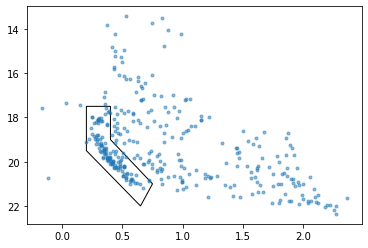

In [557]:
from matplotlib import patches

coords = [(0.2, 17.5), 
          (0.2, 19.5), 
          (0.65, 22),
          (0.75, 21),
          (0.4, 19),
          (0.4, 17.5)]
poly = patches.Polygon(coords, fill=False)

plt.plot(xs, ys, '.', alpha=0.5)
plt.gca().add_patch(poly)

plt.gca().invert_yaxis()

In [568]:
df = pd.DataFrame(dict(xs=xs, ys=ys))
df.head()

,xs,ys
0,0.648899,18.249800
1,0.925100,17.536900
2,0.824501,17.023701
3,0.628500,18.130699
4,1.871601,20.286800


In [562]:
len(df), len(df.dropna())

(345, 343)

In [563]:
df = df.dropna()

In [565]:
from shapely import geometry

polygon = geometry.Polygon(coords)

mask = [polygon.contains(Point(x, y))
        for i, (x, y) in df.iterrows()]
    
mask

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 T

In [539]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

point = Point(0.5, 0.5)
polygon = Polygon([(0, 0), (0, 1), (1, 1), (1, 0)])
print(polygon.contains(point))

True


## Select range of IDs

Use BETWEEN ... AND

In [200]:
query6_base = """SELECT *
FROM gaiadr2.panstarrs1_best_neighbour
WHERE source_id >= {low_id} AND source_id <= {high_id}
"""

Here's what it looks like.

In [201]:
query6 = query6_base.format(low_id=low_id, high_id=high_id)
print_query(query6)

SELECT *
FROM gaiadr2.panstarrs1_best_neighbour
WHERE source_id >= 637966814286573952 AND source_id <= 797441771781698304



In [202]:
job5 = Gaia.launch_job_async(query6)
print(job5)

INFO: Query finished. [astroquery.utils.tap.core]
<Table length=2837715>
            name             dtype   unit                          description                         
--------------------------- ------- ------ ------------------------------------------------------------
                  source_id   int64                                       Unique Gaia source identifier
     original_ext_source_id   int64                       Original External Catalogue source identifier
           angular_distance float64 arcsec                     Angular Distance between the two sources
       number_of_neighbours   int32                          Number of neighbours in External Catalogue
            number_of_mates   int16                                   Number of mates in Gaia Catalogue
best_neighbour_multiplicity   int16        Number of neighbours with same probability as best neighbour
    gaia_astrometric_params   int16                              Number of Gaia astrometric par

In [203]:
results5 = job5.get_results()
len(results5)

2837715

In [204]:
filename = 'data/gd1_results5.fits'
results5.write(filename, overwrite=True)

## Distance

The next thing we'd like to do is compute the distance of the GD-1 candidates.

And that will give is a chance to review `DataFrame` methods.

In [138]:
candidates['parallax']

81        0.233923
176       0.732617
417       0.933184
561       0.755347
574       0.788626
            ...   
122262    0.109922
122612    0.150967
122687    0.521759
122961    0.743345
123001    0.460792
Name: parallax, Length: 722, dtype: float64

In [120]:
candidates['parallax'].describe()

count    722.000000
mean       0.241010
std        0.545356
min       -2.749322
25%       -0.011082
50%        0.329757
75%        0.633077
max        0.999550
Name: parallax, dtype: float64

In [121]:
candidates['parallax_error'].describe()

count    722.000000
mean       0.463370
std        0.416501
min        0.030475
25%        0.161847
50%        0.331834
75%        0.631192
max        2.596624
Name: parallax_error, dtype: float64

In [122]:
ratio = candidates['parallax'] / candidates['parallax_error']
ratio.describe()

count    722.000000
mean       2.460874
std        4.591723
min       -2.752807
25%       -0.010659
50%        0.865844
75%        2.941949
max       30.244212
dtype: float64

In [139]:
good_parallax = (ratio > 2)
good_parallax.sum()

224

In [140]:
candidates.loc[good_parallax, 'parallax'].describe()

count    224.000000
mean       0.656321
std        0.210766
min        0.083755
25%        0.506642
50%        0.681000
75%        0.821000
max        0.999550
Name: parallax, dtype: float64

In [141]:
candidates['distance'] = 1 / candidates['parallax']

In [142]:
candidates.loc[~good_parallax, 'distance'] = np.nan

In [143]:
candidates['distance'].describe()

count    224.000000
mean       1.831722
std        1.232239
min        1.000450
25%        1.218028
50%        1.468455
75%        1.973781
max       11.939646
Name: distance, dtype: float64

In [144]:
x = candidates['phi1']
y = candidates['phi2']
z = candidates['distance']

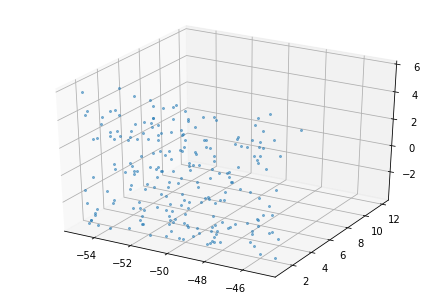

In [145]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
ax.plot(x, z, y, 'o', markersize=2, alpha=0.5);

In [146]:
import plotly.express as px

px.scatter_3d(x=x, y=y, z=z,
              size_max=0.1, opacity=0.1)

In [147]:
import plotly.graph_objects as go
import numpy as np

fig = go.Figure(data=[go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=2,
        opacity=0.5
    )
)])

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

In [61]:
stop here

SyntaxError: invalid syntax (<ipython-input-61-a96ba3aab008>, line 1)

## Submit jobs to Gaia

Make a dictionary that maps from `l` to `filename`

In [ ]:
import numpy as np

filenames = {}

for l in np.arange(-100, 20, 10):    
    filename = os.path.join(data_path, 'gd1_{0:.0f}.fits'.format(l))
    filenames[l] = filename
    
filenames

In [ ]:
jobs = {}

for l, filename in filenames.items():    
    if os.path.exists(filename):
        print('{0} exists...skipping'.format(filename))
        continue

    dphi1 = 10
    corners = gc.GD1(phi1=[l, l, l+dphi1, l+dphi1]*u.deg, 
                     phi2=[-10, 5, 5, -10]*u.deg)
    corners_icrs = corners.transform_to(coord.ICRS)
    q = q_base.format(', '.join(gaia_cols), corners_icrs)
        
    print('Submitting query for file', filename)
    job = Gaia.launch_job_async(q, name='GD1-{0}'.format(l), 
                                    background=True)
    jobs[filename] = job

In [ ]:
jobs

In [ ]:
for filename, job in jobs.items():
    print(filename)
    if os.path.exists(filename):
        print('{0} exists...skipping'.format(filename))
        continue

    try:
        tbl = job.get_results()
    except:
        print('Error')
        continue
        
    print('Writing...')
    tbl.write(filename, overwrite=True)
    print('Done')

In [ ]:
import os

data_path = 'data/gd1-polygon/'
os.makedirs(data_path, exist_ok=True)

In [ ]:
gaia_cols = ['source_id', 
             'ra', 'dec', 
             'parallax', 
             'parallax_error', 
             'pmra', 
             'pmra_error', 
             'pmdec', 
             'pmdec_error', 
             'ra_parallax_corr', 
             'ra_pmra_corr', 
             'ra_pmdec_corr', 
             'dec_parallax_corr', 
             'dec_pmra_corr', 
             'dec_pmdec_corr', 
             'parallax_pmra_corr', 
             'parallax_pmdec_corr', 
             'pmra_pmdec_corr', 
             'visibility_periods_used', 
             'phot_g_mean_mag', 
             'phot_g_mean_flux_over_error', 
             'phot_bp_mean_mag', 
             'phot_bp_mean_flux_over_error', 
             'phot_rp_mean_mag', 
             'phot_rp_mean_flux_over_error', 
             'phot_bp_rp_excess_factor', 
             'astrometric_chi2_al', 
             'astrometric_n_good_obs_al']

`gc.GD1` is the [astro-gala coordinate class for the Sagittarius coordinate system](https://gala-astro.readthedocs.io/en/latest/_modules/gala/coordinates/gd1.html)

In [ ]:
import astropy.units as u
import gala.coordinates as gc

l = 30
dphi1 = 10

phi1 = [l, l, l+dphi1, l+dphi1] * u.deg
phi2 = [-10, 5, 5, -10] * u.deg

corners = gc.GD1(phi1=phi1, phi2=phi2)
corners

Convert to [International Celestial Reference System](https://en.wikipedia.org/wiki/International_Celestial_Reference_System)

In [ ]:
corners_icrs = corners.transform_to(coord.ICRS)
corners_icrs

In [ ]:
columns = ', '.join(gaia_cols)
columns

In [ ]:
q_base = '''SELECT {0}
FROM gaiadr2.gaia_source
WHERE parallax < 1 AND bp_rp > -0.75 AND bp_rp < 2 AND
      CONTAINS(POINT('ICRS', ra, dec), 
               POLYGON('ICRS', 
                       {1[0].ra.degree}, {1[0].dec.degree}, 
                       {1[1].ra.degree}, {1[1].dec.degree}, 
                       {1[2].ra.degree}, {1[2].dec.degree}, 
                       {1[3].ra.degree}, {1[3].dec.degree})) = 1
'''

In [ ]:
q = q_base.format(columns, corners_icrs)
for line in q.split('\n'):
    print(line)

## Submit jobs to Gaia

Make a dictionary that maps from `l` to `filename`

In [ ]:
import numpy as np

filenames = {}

for l in np.arange(-100, 20, 10):    
    filename = os.path.join(data_path, 'gd1_{0:.0f}.fits'.format(l))
    filenames[l] = filename
    
filenames

In [ ]:
jobs = {}

for l, filename in filenames.items():    
    if os.path.exists(filename):
        print('{0} exists...skipping'.format(filename))
        continue

    dphi1 = 10
    corners = gc.GD1(phi1=[l, l, l+dphi1, l+dphi1]*u.deg, 
                     phi2=[-10, 5, 5, -10]*u.deg)
    corners_icrs = corners.transform_to(coord.ICRS)
    q = q_base.format(', '.join(gaia_cols), corners_icrs)
        
    print('Submitting query for file', filename)
    job = Gaia.launch_job_async(q, name='GD1-{0}'.format(l), 
                                    background=True)
    jobs[filename] = job

In [ ]:
jobs

In [ ]:
for filename, job in jobs.items():
    print(filename)
    if os.path.exists(filename):
        print('{0} exists...skipping'.format(filename))
        continue

    try:
        tbl = job.get_results()
    except:
        print('Error')
        continue
        
    print('Writing...')
    tbl.write(filename, overwrite=True)
    print('Done')

In [ ]:
!ls -l data/gd1-polygon/gd1_*.fits

In [ ]:
filename = 'data/gd1-polygon/gd1_-100.fits'

In [ ]:
from astropy.table import Table
table = Table.read(filename)

In [ ]:
len(table)

In [ ]:
import pandas as pd

df = table.to_pandas()
df.shape

In [ ]:
df.head()

In [ ]:
for col in df.columns:
    print(col, df[col].dtype)

In [ ]:
df['ra'].describe()

# Combine tables

In [ ]:
import glob

filenames = glob.glob('data/gd1-polygon/*.fits')
filenames

Read all files into tables and make a list of tables.

In [ ]:
all_filename = 'data/gd1-all.fits'

if not os.path.exists(all_filename):
    tables = []
    for filename in filenames:
        print(filename)
        table = Table.read(filename)
        tables.append(table)

Combine all tables into one.

In [ ]:
from astropy.table import vstack

all_table = vstack(tables)

Making `tables` refer to an empty list allows Python to garbage collect the lists.

In [ ]:
tables = []

Write the consolidated Table to a file.

In [ ]:
all_table.write(all_filename)

In [ ]:
# all_data.to_hdf('data/gd1-all.hdf', 'all_data', complevel=3)

In [1]:
!ls -l data/gd1-all.fits

ls: cannot access 'data/gd1-all.fits': No such file or directory


In [ ]:
import glob
import sqlite3
from astropy.table import Table

db_filename = 'data/gd1-all.db'

con = sqlite3.connect(db_filename)

filenames = glob.glob('data/gd1-polygon/*.fits')

for filename in filenames:
    print('Reading', filename)
    table = Table.read(filename)
    print('Writing to db')
    df = table.to_pandas()
    df.to_sql(name='data', con=con, if_exists='append')
    
print('Done')

In [ ]:
!ls -l data/gd1-all.db

In [ ]:
!ls -l data/gd1-all.fits

## Read the data back

In [35]:
from pyia import GaiaData

g = GaiaData(all_filename)

NameError: name 'all_filename' is not defined

In [ ]:
c_gd1 = g.get_skycoord(distance=8*u.kpc, 
                       radial_velocity=0*u.km/u.s)

In [ ]:
c_dg1 = c_gd1.transform_to(gc.GD1)

In [ ]:
c_gd1 = gc.reflex_correct(c_gd1)

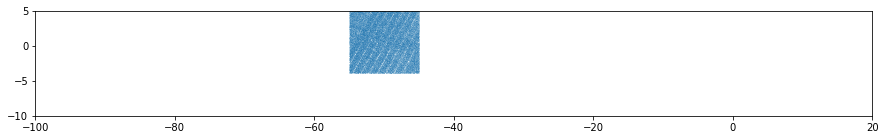

In [34]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(15, 5))

ax.plot(c_gd1.phi1.wrap_at(180*u.deg),
        c_gd1.phi2, 
        marker=',', linestyle='none', alpha=0.05)

ax.set_xlim(-100, 20)
ax.set_ylim(-10, 5)

ax.set_aspect('equal')

In [ ]:
phi_mask = ((np.abs(c_gd1.phi2) < 1*u.deg) & 
            (c_gd1.phi1.wrap_at(180*u.deg) > -60*u.deg) & 
            (c_gd1.phi1.wrap_at(180*u.deg) < 10*u.deg))

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(c_gd1.pm_phi1_cosphi2[phi_mask], 
        c_gd1.pm_phi2[phi_mask], 
        marker='.', markersize=1, alpha=0.1, ls='none')
ax.set_xlim(-12, 8)
ax.set_ylim(-10, 10)

In [657]:
def make_adql_rectangle(low1, high1, low2, high2):
    ra = [low1, low1, high1, high1]
    dec = [low2, high2, high2, low2]
    
    point_base = "{point[0]}, {point[1]}"

    t = [point_base.format(point=point)
         for point in np.transpose([ra, dec])]
         
    poly_base = "POLYGON('ICRS', {point_list})"
    point_list = ', '.join(t)
    return poly_base.format(point_list=point_list)

In [662]:
polygon2 = make_adql_rectangle(pmra_min.value, 
                                pmra_max.value, 
                                pmdec_min.value, 
                                pmdec_max.value)
polygon2

"POLYGON('ICRS', -7.0, -15.0, -7.0, -11.0, -2.0, -11.0, -2.0, -15.0)"